In [1]:
from fluids import H2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Times New Roman',size="10")
mpl.rc('figure', figsize=(4.8,3.6))
mpl.rc('legend', labelspacing=0.15)
mpl.rc('savefig', dpi=800)
mpl.rc('lines', linewidth=1.2)
mpl.rc('axes', grid=True)
mpl.rc('grid', linewidth=0.25)
mpl.rc('mathtext', fontset="dejavuserif")
mpl.rc('xtick.minor', visible=True, size=1.5, width=0.5)
mpl.rc('ytick.minor', visible=True, size=1.5, width=0.5)
plt.rcParams['figure.constrained_layout.use'] =  True

In [2]:
base = {"P_core":10e6,
        "T_channel":450,
        "r5":56e-3,
        "d56":8e-3,
        "N":7000,
        "nu_s":0.693,
        "L_CFE":.84,
        "T_core":3700}

stdlim = [0.5, 2]
vary = {"P_core":stdlim,
        "T_channel":stdlim,
        "r5":[0.93,1.5],
        "d56":stdlim,
        "N":stdlim,
        "nu_s":[0.5,1.08],
        "L_CFE":stdlim}

labels = {"P_core":"core pressure $P_3$", 
        "T_channel":"channel temperature $T_1$",
        "r5":"case radius $r_5$",
        "d56":"outer channel width $(r_6 - r_5)$",
        "N":"CFE rotation rate $\omega$",
        "nu_s":"isentropic vel. ratio $\\nu_s$",
        "L_CFE":"CFE length $l$"}
cols = {"P_core":"k",
        "T_channel":"b",
        "r5":[1,0.9,0],
        "d56":[.14, .75, .196],
        "N":"red",
        "nu_s":"gray",
        "L_CFE":"hotpink"}

yvals = dict()
xvals = dict()

base_core = H2(P=base["P_core"], T=base["T_core"])      # speed code up by not calculating on every single loop

In [3]:
def sweep(name, ylabel, ylim=None, scale=1):
    plt.figure()
    yvals = np.load(f"{name}.npz", allow_pickle=True)
    n_pts = 50
    print(ylabel, yvals["baseline"]*scale)
    for key in vary:       # plot each line
        lim = vary[key]                 # relative property value limits
        xvals[key] = np.arange(lim[0], lim[1]+1e-5, np.diff(lim)/n_pts)
        plt.plot(xvals[key], yvals[key]*scale, label=labels[key], color=cols[key])

    plt.xlim(0.4,2.1)
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(title="Normalized Parameter", title_fontproperties={"family": "Times New Roman:bold"})
    plt.xlabel("Parameter Normalized to Baseline Configuration")
    plt.ylabel(ylabel)
    plt.savefig(f"{name}2.svg")

Turbine Work Rate (W) [137.96096304]
Turbine Efficiency [0.88901496]
Turbine Radius (cm) [5.06807181]
CFE mass (kg) [56.23810848]
Bearing Losses (W) [32.62290305]
Viscous Losses (W) [105.33805999]


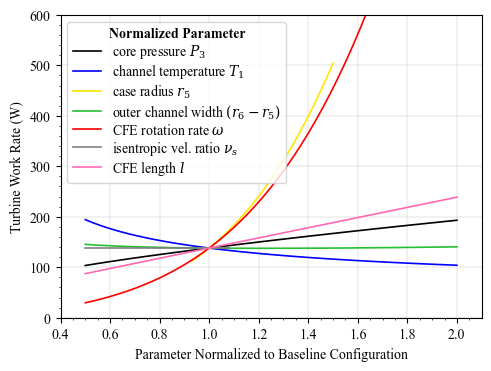

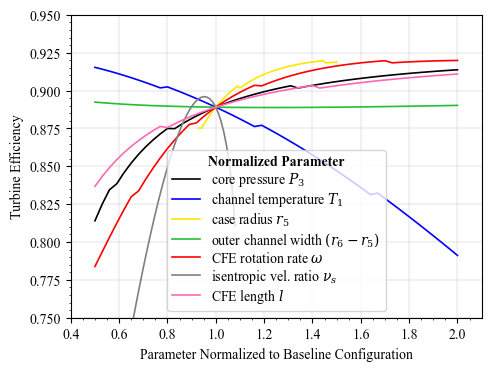

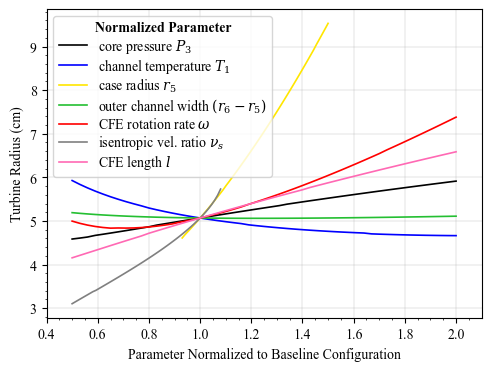

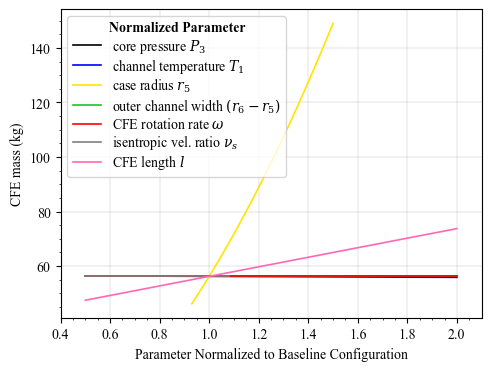

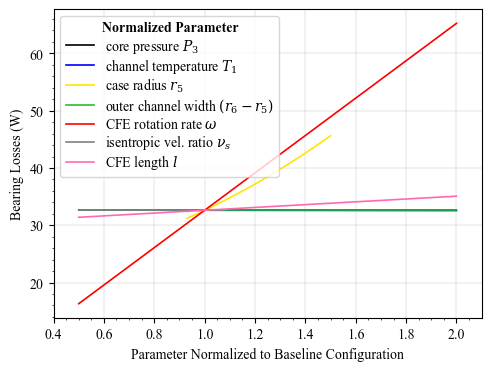

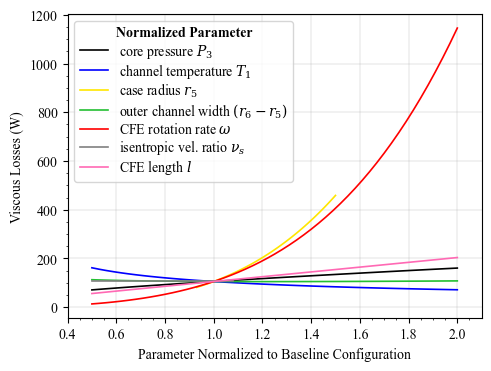

In [6]:
dir = "turbine_sweep"
savenames = ['eta', 'W_bear', 'W_visc', 'W', 'radius', 'mass']
sweep(f"{dir}/W", "Turbine Work Rate (W)", ylim=(0,600), scale=1)
sweep(f"{dir}/eta", "Turbine Efficiency", ylim=(.75,.95))
sweep(f"{dir}/radius", "Turbine Radius (cm)", scale=100)
sweep(f"{dir}/mass", "CFE mass (kg)", scale=1)
sweep(f"{dir}/W_bear", "Bearing Losses (W)", scale=1)
sweep(f"{dir}/W_visc", "Viscous Losses (W)", scale=1)


In [5]:
mpl.colors.to_rgb("limegreen")

(0.19607843137254902, 0.803921568627451, 0.19607843137254902)